In [1]:
import math
import statistics as stats2

from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import stats
import numpy as np
import pandas as pd


%matplotlib inline

In [2]:
people = pd.DataFrame({
    "name": [ "Bob", "Sally", "Timmy", "Bridget", "Susan", "Steve" ],
    "city": [ "San Jose", "San Diego", "New York", "San Jose", "Austin", "New York" ],
    "state": [ "CA", "CA", "NY", "CA", "TX", "NY" ]
})

people

,name,city,state
0,Bob,San Jose,CA
1,Sally,San Diego,CA
2,Timmy,New York,NY
3,Bridget,San Jose,CA
4,Susan,Austin,TX
5,Steve,New York,NY


In [3]:
people.value_counts()

name     city       state
Bob      San Jose   CA       1
Bridget  San Jose   CA       1
Sally    San Diego  CA       1
Steve    New York   NY       1
Susan    Austin     TX       1
Timmy    New York   NY       1
dtype: int64

In [4]:
people["city"].value_counts()

San Jose     2
New York     2
San Diego    1
Austin       1
Name: city, dtype: int64

In [5]:
people[ ["city", "state"] ].value_counts()

MultiIndex([( 'New York', 'NY'),
            ( 'San Jose', 'CA'),
            (   'Austin', 'TX'),
            ('San Diego', 'CA')],
           names=['city', 'state'])

In [6]:
people.groupby([ "city", "state" ]).size()

city       state
Austin     TX       1
New York   NY       2
San Diego  CA       1
San Jose   CA       2
dtype: int64

In [7]:
people_grouped = people.groupby([ "city", "state" ]).size().sort_values(ascending=False)

In [12]:
people_grouped

city       state
New York   NY       2
San Jose   CA       2
Austin     TX       1
San Diego  CA       1
dtype: int64

In [9]:
type(people_grouped)

pandas.core.series.Series

In [13]:
people_grouped.unstack()

state,CA,NY,TX
city,,,
Austin,NaN,NaN,1.0
New York,NaN,2.0,NaN
San Diego,1.0,NaN,NaN
San Jose,2.0,NaN,NaN


In [16]:
state_by_city = people_grouped.unstack(0)

In [17]:
state_by_city

city,Austin,New York,San Diego,San Jose
state,,,,
CA,NaN,NaN,1.0,2.0
NY,NaN,2.0,NaN,NaN
TX,1.0,NaN,NaN,NaN


In [18]:
state_by_city.fillna(0, inplace=True)

state_by_city

city,Austin,New York,San Diego,San Jose
state,,,,
CA,0.0,0.0,1.0,2.0
NY,0.0,2.0,0.0,0.0
TX,1.0,0.0,0.0,0.0


In [19]:
state_by_city.sort_values(by=["New York"], ascending=False)

city,Austin,New York,San Diego,San Jose
state,,,,
NY,0.0,2.0,0.0,0.0
CA,0.0,0.0,1.0,2.0
TX,1.0,0.0,0.0,0.0


In [20]:
import random

days = pd.Series({
    "1": random.random(),
    "2": random.random(),
    "5": random.random(),
    "7": random.random(),
    "8": random.random(),
    "9": random.random(),
})

display(days)

1    0.760047
2    0.029538
5    0.208425
7    0.583357
8    0.608796
9    0.704043
dtype: float64

In [21]:
days.index

Index(['1', '2', '5', '7', '8', '9'], dtype='object')

In [22]:
reindexed_days = days.reindex([ str(v) for v in range(1,11) ])

reindexed_days

1     0.760047
2     0.029538
3          NaN
4          NaN
5     0.208425
6          NaN
7     0.583357
8     0.608796
9     0.704043
10         NaN
dtype: float64

In [23]:
reindexed_days.fillna(0, inplace=True)

reindexed_days

1     0.760047
2     0.029538
3     0.000000
4     0.000000
5     0.208425
6     0.000000
7     0.583357
8     0.608796
9     0.704043
10    0.000000
dtype: float64

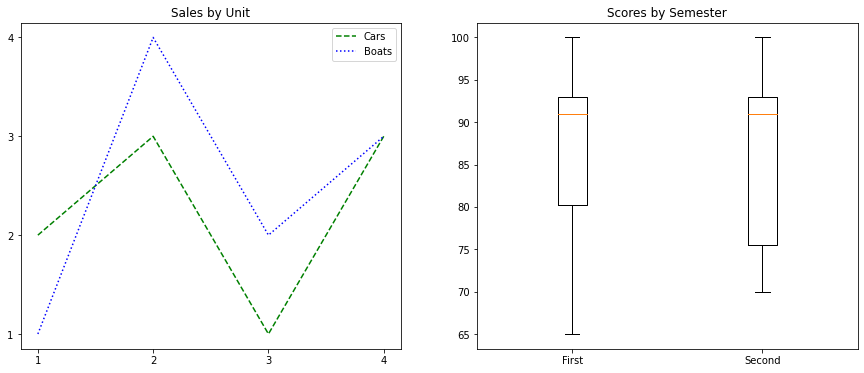

In [24]:
line1 = np.array([
    [1,2], [2,3], [3,1], [4, 3]
])

line2 = np.array([
    [1,1], [2,4], [3,2], [4, 3]
])

first_semester = np.array([65, 67, 68, 72, 72, 80, 81, 82, 82, 91, 91, 91, 93, 94, 91, 91, 91, 93, 94, 100, 100, 100])
second_semester = np.array([75, 77, 78, 72, 72, 70, 71, 72, 82, 91, 91, 91, 93, 94, 91, 91, 91, 93, 94, 100, 100, 100])



fig_1 = plt.figure(1, figsize=(15, 6))

chart_1 = fig_1.add_subplot(121)
chart_2 = fig_1.add_subplot(122)

chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.yaxis.set_major_locator(MaxNLocator(integer=True))


chart_1.plot(line1[:,0], line1[:,1], label="Cars", color='green', linestyle='dashed')
chart_1.plot(line2[:,0], line2[:,1], label="Boats", color='blue', linestyle='dotted')

chart_1.set_title('Sales by Unit')
chart_1.xaxis.set_label('Quarter')
chart_1.yaxis.set_label('Amount')
chart_1.legend(loc='upper right')


chart_2.boxplot([first_semester, second_semester], labels=["First", "Second"])

chart_2.set_title('Scores by Semester')
chart_2.xaxis.set_label('Semester')
chart_2.yaxis.set_label('Scores')

plt.show()